# PROJET LA PAGE LIBRAIRIE 

In [2]:
# Importation CSV 

In [3]:
import pandas as pd
import numpy as np

customers = pd.read_csv('customers.csv', sep=';')
products = pd.read_csv('products.csv', sep=';')
transactions = pd.read_csv('Transactions.csv', sep=';', low_memory=False)


In [4]:
# date format
transactions['date'] = pd.to_datetime(transactions['date'], errors='coerce')
customers['birth'] = pd.to_numeric(customers['birth'], errors='coerce')

In [5]:
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8616,c_7920,m,1956
8617,c_7403,f,1970
8618,c_5119,m,1974
8619,c_5643,f,1968


In [6]:
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3281,2_23,115.99,2
3282,0_146,17.14,0
3283,0_802,11.22,0
3284,1_140,38.56,1


In [7]:
transactions

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
1048570,NaN,NaT,NaN,NaN
1048571,NaN,NaT,NaN,NaN
1048572,NaN,NaT,NaN,NaN
1048573,NaN,NaT,NaN,NaN


In [8]:
transactions.duplicated().sum()
transactions.drop_duplicates(inplace=True)
transactions

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848
687533,0_1398,2023-02-28 23:58:30.792755,s_348435,c_3575


In [9]:
df_merged = transactions.merge(products, on='id_prod', how='left')\
                        .merge(customers, on='client_id', how='left')

In [10]:
df_merged 

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0.0,f,1967.0
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0.0,m,1960.0
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0.0,m,1988.0
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0.0,f,1989.0
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0.0,f,1956.0
...,...,...,...,...,...,...,...,...
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,48.99,2.0,f,1994.0
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,26.99,1.0,f,1985.0
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,8.99,0.0,m,1953.0
687533,0_1398,2023-02-28 23:58:30.792755,s_348435,c_3575,4.52,0.0,f,1981.0


# Statistiques descriptives 

In [12]:
# 'CA' en prix (prix)
df_merged['CA'] = df_merged['price']

# Merge par mois 
df_merged['month'] = df_merged['date'].dt.to_period('M')
ca_mensuel = df_merged.groupby('month')['CA'].sum().reset_index()

# 'month' en datetime
ca_mensuel['month'] = ca_mensuel['month'].dt.to_timestamp()

ca_mensuel

,month,CA
0,2021-03-01,482440.61
1,2021-04-01,476109.30
2,2021-05-01,492943.47
3,2021-06-01,484088.56
4,2021-07-01,482835.40
5,2021-08-01,482284.79
6,2021-09-01,507240.68
7,2021-10-01,494733.16
8,2021-11-01,516167.73
9,2021-12-01,525917.28


In [13]:
# Moyenne mobile (3 mois)
ca_mensuel['CA_moyenne_mobile'] = ca_mensuel['CA'].rolling(window=3).mean()
ca_mensuel

,month,CA,CA_moyenne_mobile
0,2021-03-01,482440.61,NaN
1,2021-04-01,476109.30,NaN
2,2021-05-01,492943.47,483831.126667
3,2021-06-01,484088.56,484380.443333
4,2021-07-01,482835.40,486622.476667
5,2021-08-01,482284.79,483069.583333
6,2021-09-01,507240.68,490786.956667
7,2021-10-01,494733.16,494752.876667
8,2021-11-01,516167.73,506047.190000
9,2021-12-01,525917.28,512272.723333


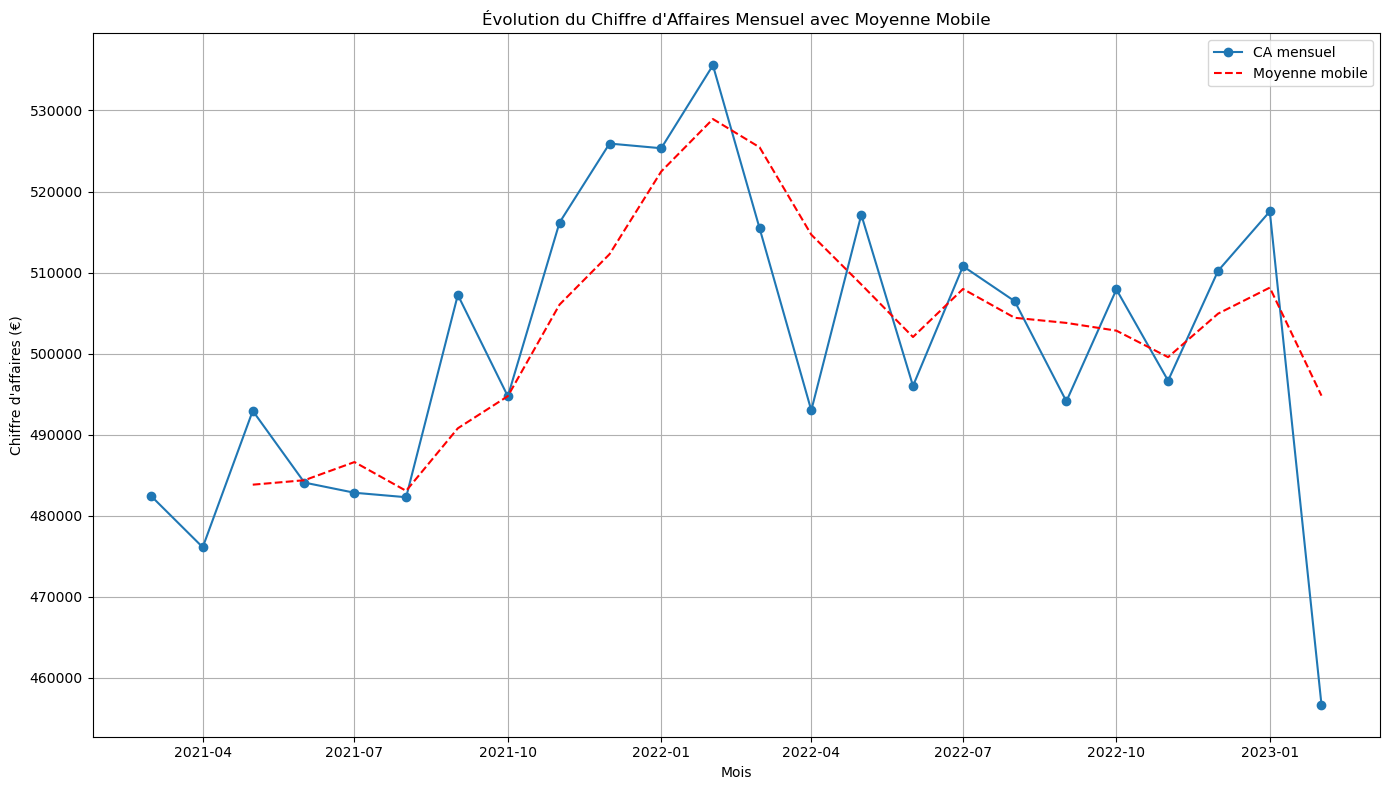

In [14]:
import matplotlib.pyplot as plt

# Graphique d'évolution du CA mensuel
plt.figure(figsize=(14, 8))
plt.plot(ca_mensuel['month'], ca_mensuel['CA'], marker='o', label='CA mensuel')
plt.plot(ca_mensuel['month'], ca_mensuel['CA_moyenne_mobile'], color='red', linestyle='--', label='Moyenne mobile')

plt.title("Évolution du Chiffre d'Affaires Mensuel avec Moyenne Mobile")
plt.xlabel("Mois")
plt.ylabel("Chiffre d'affaires (€)")
plt.grid(True)
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
# CA hebdomadaire
df_merged['week'] = df_merged['date'].dt.to_period('W')
ca_hebdo = df_merged.groupby('week')['CA'].sum().reset_index()
ca_hebdo['week'] = ca_hebdo['week'].dt.start_time  # Convertir en datetime

# Moyenne mobile hebdomadaire (4 semaines)
ca_hebdo['CA_moyenne_mobile'] = ca_hebdo['CA'].rolling(window=4).mean()

ca_hebdo

,week,CA,CA_moyenne_mobile
0,2021-03-01,110463.28,NaN
1,2021-03-08,105693.24,NaN
2,2021-03-15,112059.08,NaN
3,2021-03-22,109441.07,109414.1675
4,2021-03-29,107895.66,108772.2625
...,...,...,...
100,2023-01-30,113486.13,115826.1825
101,2023-02-06,112528.15,114423.3075
102,2023-02-13,114121.61,114878.9450
103,2023-02-20,112245.15,113095.2600


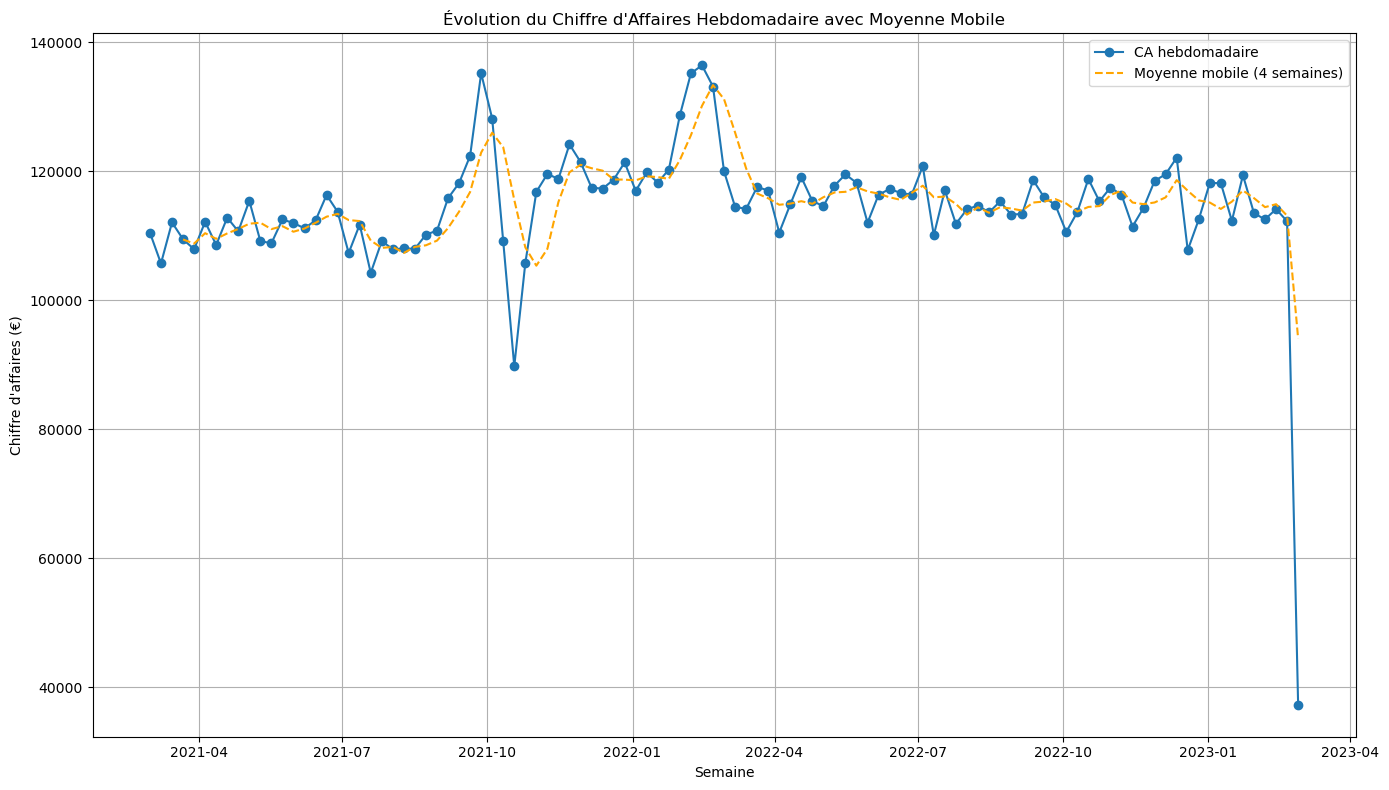

In [16]:
# Graphique hebdomadaire
plt.figure(figsize=(14, 8))
plt.plot(ca_hebdo['week'], ca_hebdo['CA'], marker='o', label='CA hebdomadaire')
plt.plot(ca_hebdo['week'], ca_hebdo['CA_moyenne_mobile'], color='orange', linestyle='--', label='Moyenne mobile (4 semaines)')

plt.title("Évolution du Chiffre d'Affaires Hebdomadaire avec Moyenne Mobile")
plt.xlabel("Semaine")
plt.ylabel("Chiffre d'affaires (€)")
plt.grid(True)
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [17]:
# CA total par catégorie
ca_categ = df_merged.groupby('categ')['CA'].sum().reset_index().sort_values(by='CA', ascending=False)
ca_categ

,categ,CA
1,1.0,4827657.11
0,0.0,4419730.97
2,2.0,2780275.02


C:\Users\David\AppData\Local\Temp\ipykernel_7744\142383282.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ca_categ, x='categ', y='CA', palette='viridis')


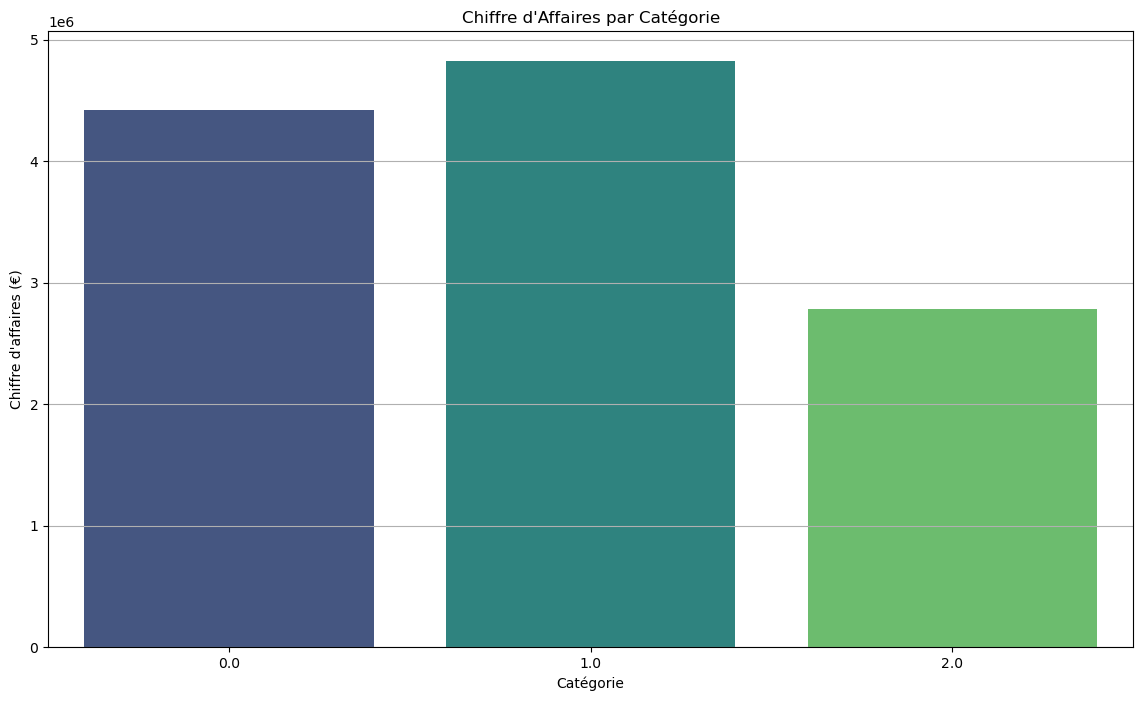

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
sns.barplot(data=ca_categ, x='categ', y='CA', palette='viridis')

plt.title('Chiffre d\'Affaires par Catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Chiffre d\'affaires (€)')
plt.grid(axis='y')

plt.show()

In [19]:
# CA mensuel par catégorie
ca_mensuel_categ = df_merged.groupby(['month', 'categ'])['CA'].sum().unstack().fillna(0)

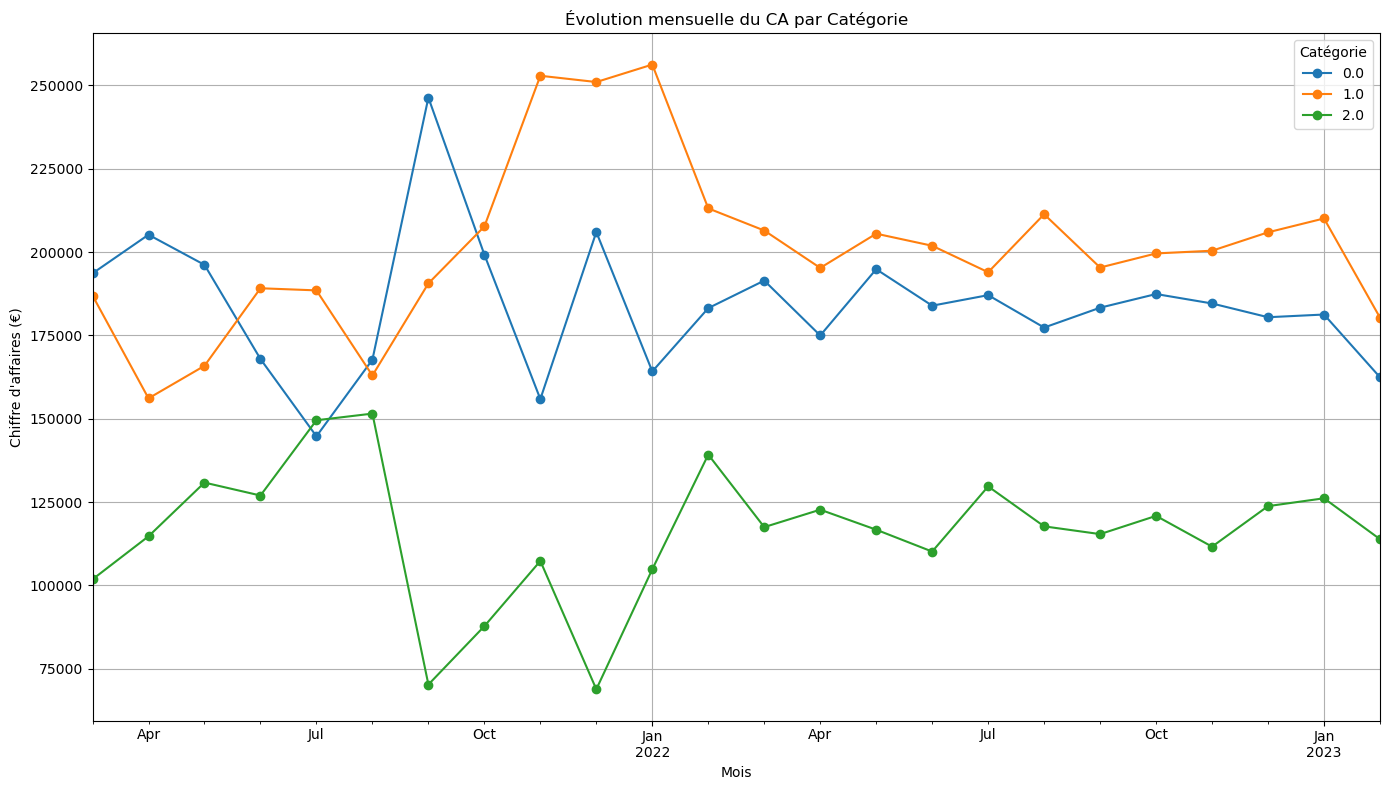

In [20]:
# Graph Evolution Mensuelle du CA par Catégorie
ca_mensuel_categ.plot(figsize=(14,8), marker='o')

plt.title('Évolution mensuelle du CA par Catégorie')
plt.xlabel('Mois')
plt.ylabel('Chiffre d\'affaires (€)')
plt.grid(True)
plt.xticks(rotation=0)
plt.legend(title='Catégorie')
plt.tight_layout()
plt.show()

In [21]:
# Colonne nombre de clients uniques par mois
df_merged['month'] = df_merged['date'].dt.to_period('M').dt.to_timestamp()
clients_per_month = df_merged.groupby('month')['client_id'].nunique().reset_index(name='n_clients')

clients_per_month

,month,n_clients
0,2021-03-01,5676
1,2021-04-01,5674
2,2021-05-01,5644
3,2021-06-01,5659
4,2021-07-01,5672
5,2021-08-01,5642
6,2021-09-01,5693
7,2021-10-01,6190
8,2021-11-01,5875
9,2021-12-01,5867


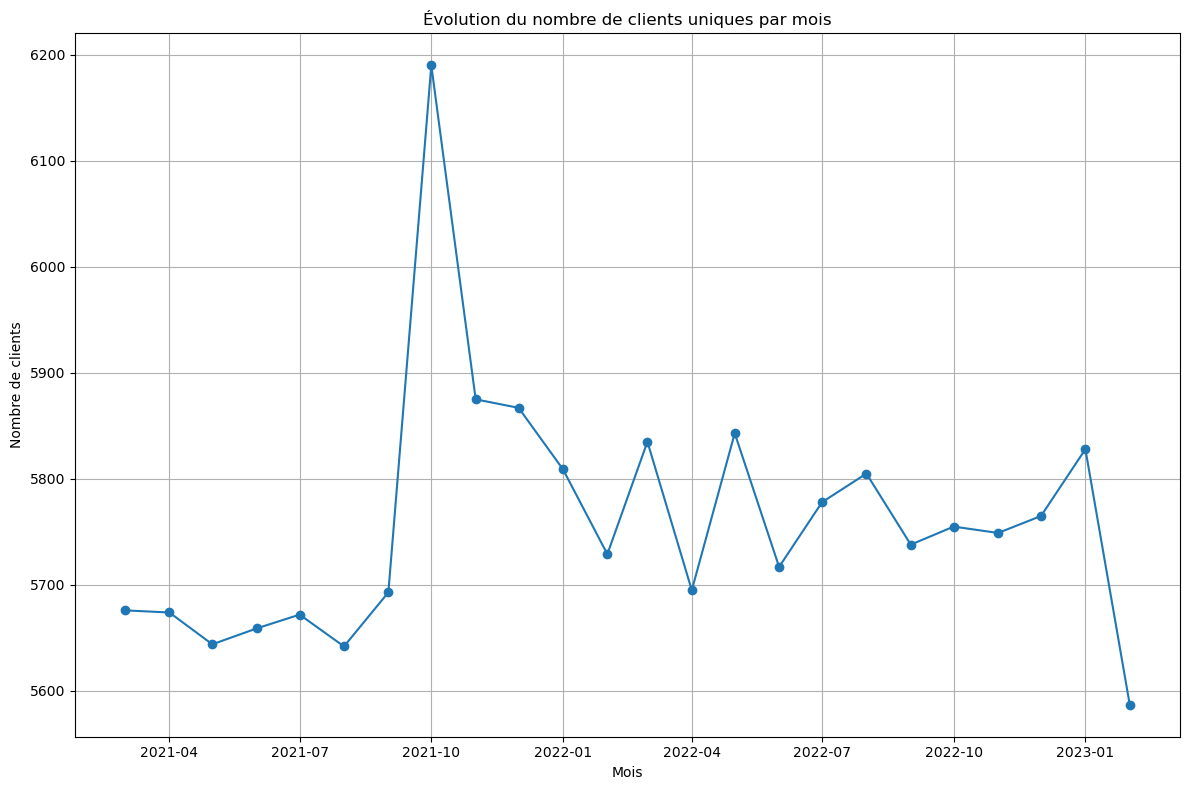

In [22]:
# Graph Evolution du nombre de clients unique par mois

plt.figure(figsize=(12, 8))
plt.plot(clients_per_month['month'], clients_per_month['n_clients'], marker='o')
plt.title("Évolution du nombre de clients uniques par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de clients")
plt.grid(True)
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [23]:
#nombre de produits vendus par mois

nb_produits_vendus = df_merged.groupby('month').size().reset_index(name='n_produits_vendus')
nb_produits_vendus

,month,n_produits_vendus
0,2021-03-01,28601
1,2021-04-01,28443
2,2021-05-01,28285
3,2021-06-01,26850
4,2021-07-01,24738
5,2021-08-01,25650
6,2021-09-01,33314
7,2021-10-01,30022
8,2021-11-01,28311
9,2021-12-01,32457


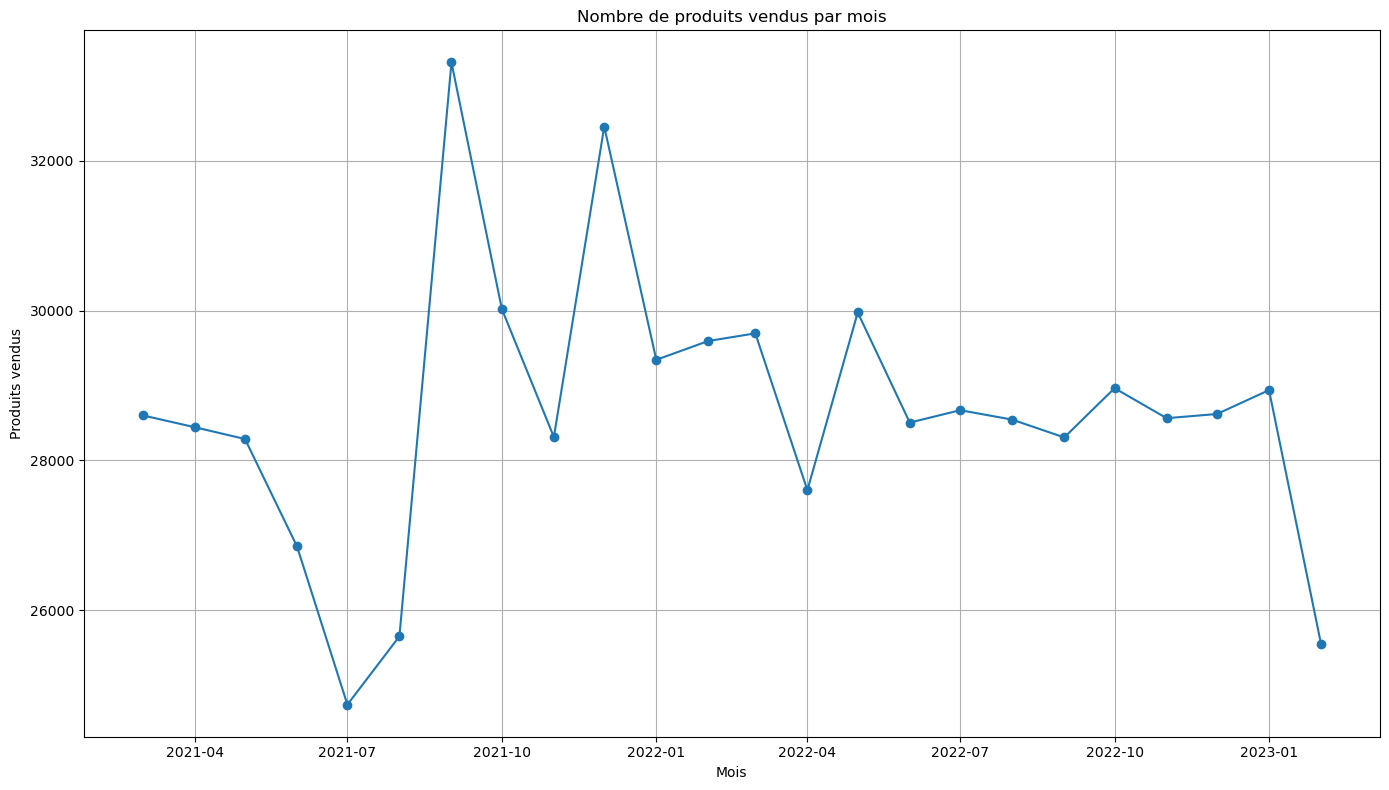

In [24]:
# Graph nombre de produits vendus par mois 
plt.figure(figsize=(14, 8))
plt.plot(nb_produits_vendus['month'], nb_produits_vendus['n_produits_vendus'], marker='o')
plt.title("Nombre de produits vendus par mois")
plt.xlabel("Mois")
plt.ylabel("Produits vendus")
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ZOOM REFERENCE 

In [26]:
# TOP 10 REF

top_ventes = ( df_merged.groupby('id_prod').size().reset_index(name='nb_ventes').merge(products, on='id_prod', how='left').sort_values('nb_ventes', ascending=False))

print("Top 10 des produits les plus vendus :")

top_ventes.head(10)

Top 10 des produits les plus vendus :


,id_prod,nb_ventes,price,categ
2591,1_369,2340,23.99,1
2644,1_417,2269,20.99,1
2641,1_414,2246,23.83,1
2733,1_498,2202,23.37,1
2653,1_425,2163,16.99,1
2629,1_403,2040,17.99,1
2640,1_413,2036,17.99,1
2639,1_412,2014,16.65,1
2632,1_406,2003,24.81,1
2633,1_407,2001,15.99,1


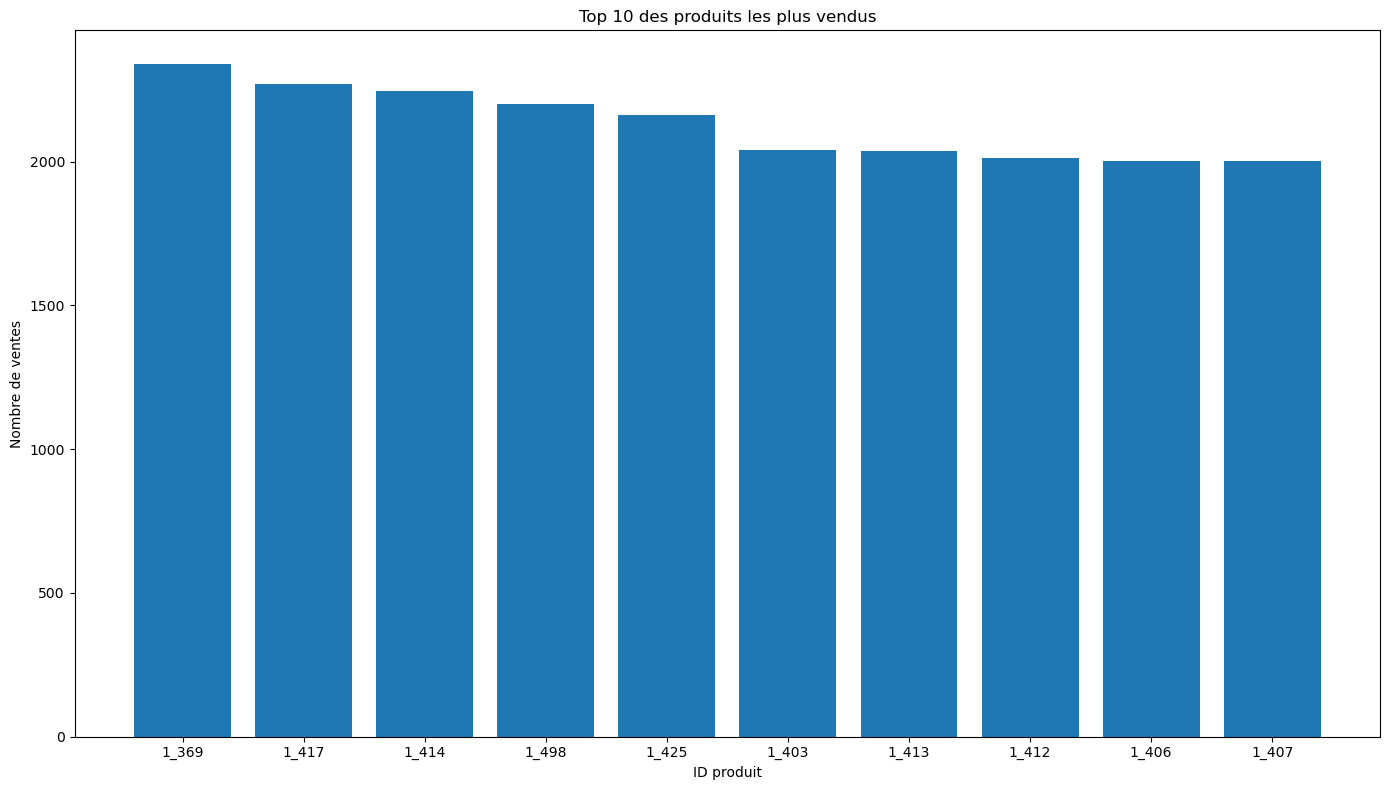

In [27]:
# Graph TOP 10
plt.figure(figsize=(14,8))
plt.bar(top_ventes.head(10)['id_prod'], top_ventes.head(10)['nb_ventes'])
plt.title('Top 10 des produits les plus vendus')
plt.xlabel('ID produit')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [28]:
# TOP FLOP REF

flop_ca = df_merged.groupby('id_prod')['CA'].sum().reset_index().merge(products, on='id_prod', how='left').sort_values('CA', ascending=True)
flop_10_ca = flop_ca.head(10).sort_values('price')

print("Top 10 des produits les moins vendus :")
flop_10_ca.head(10)

Top 10 des produits les moins vendus :


,id_prod,CA,price,categ
595,0_1539,0.99,0.99,0
719,0_1653,1.98,0.99,0
2179,0_898,2.54,1.27,0
925,0_1840,2.56,1.28,0
313,0_1284,1.38,1.38,0
1784,0_541,1.99,1.99,0
665,0_1601,1.99,1.99,0
2079,0_807,1.99,1.99,0
802,0_1728,2.27,2.27,0
549,0_1498,2.48,2.48,0


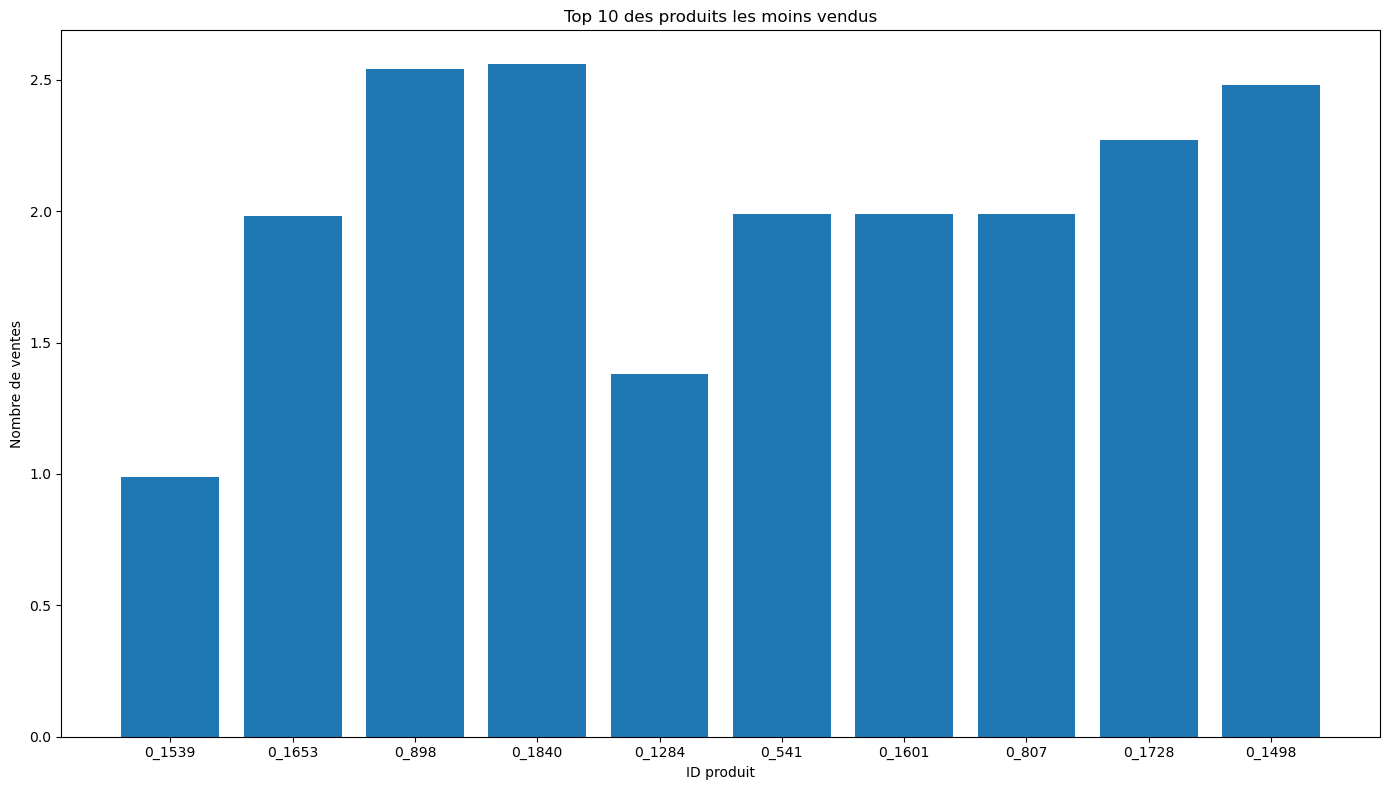

In [29]:
plt.figure(figsize=(14,8))
plt.bar(flop_10_ca.head(10)['id_prod'], flop_10_ca.head(10)['CA'])
plt.title('Top 10 des produits les moins vendus')
plt.xlabel('ID produit')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [30]:
# Ref par catégorie
repartition_refs = products.groupby('categ')['id_prod'].nunique().reset_index(name='nb_references').sort_values('nb_references', ascending=False)

repartition_refs

,categ,nb_references
0,0,2308
1,1,739
2,2,239


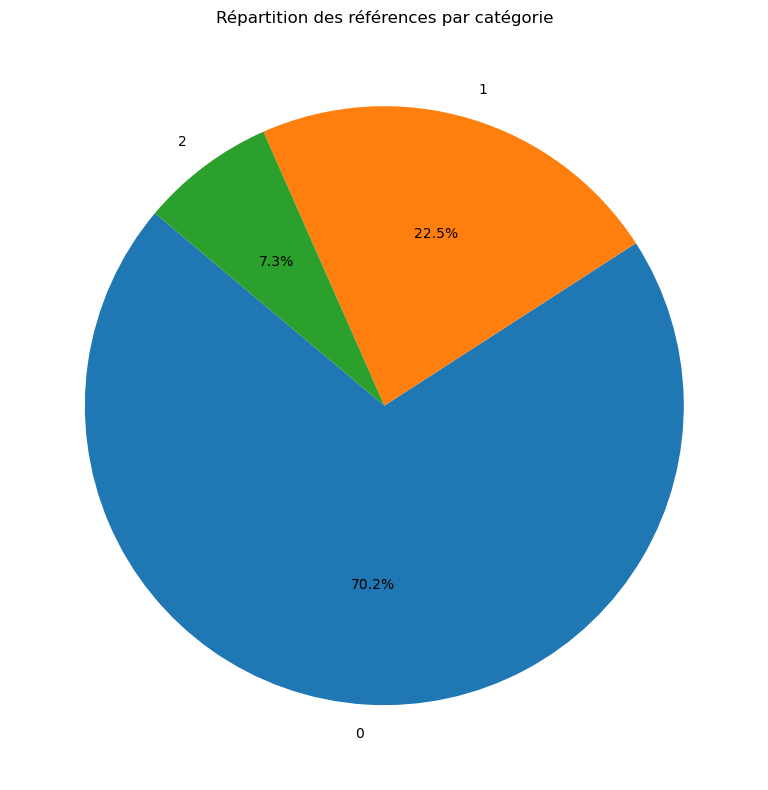

In [31]:
plt.figure(figsize=(8, 8))
plt.pie(repartition_refs['nb_references'],
    labels=repartition_refs['categ'].astype(str),
    autopct='%1.1f%%',
    startangle=140)

plt.title("Répartition des références par catégorie")
plt.tight_layout()
plt.show()

In [32]:
#RECHERCHE BTOB

In [33]:
# Avec ID customers différent
customers['len_id'] = customers['client_id'].str.len()
customers['len_id'].value_counts()

len_id
6    7622
5     900
4      90
3       9
Name: count, dtype: int64

In [34]:
#Avec date de naissance différent
customers['birth'].describe()

count    8621.000000
mean     1978.275606
std        16.917958
min      1929.000000
25%      1966.000000
50%      1979.000000
75%      1992.000000
max      2004.000000
Name: birth, dtype: float64

In [35]:
# Transaction =/= normale
transaction_anormale = df_merged['client_id'].value_counts().reset_index(name='nb_transactions')
transaction_anormale.columns = ['client_id', 'nb_transactions']

transaction_anormale.head(20)

,client_id,nb_transactions
0,c_1609,25586
1,c_6714,9199
2,c_3454,6793
3,c_4958,5222
4,c_2140,405
5,c_3263,403
6,c_2595,398
7,c_2077,386
8,c_1637,384
9,c_7421,381


In [36]:
# liste client BotB

clients_btob = ['c_1609', 'c_6714', 'c_3454', 'c_4958']

In [37]:
btob_transactions = df_merged[df_merged['client_id'].isin(clients_btob)]
btob_transactions

,id_prod,date,session_id,client_id,price,categ,sex,birth,CA,month,week
6,0_1304,2021-03-01 00:07:04.371179,s_7,c_1609,5.86,0.0,m,1980.0,5.86,2021-03-01,2021-03-01/2021-03-07
13,0_1159,2021-03-01 00:11:57.832228,s_7,c_1609,7.99,0.0,m,1980.0,7.99,2021-03-01,2021-03-01/2021-03-07
50,0_1431,2021-03-01 01:08:49.803921,s_33,c_3454,10.99,0.0,m,1969.0,10.99,2021-03-01,2021-03-01/2021-03-07
78,0_1425,2021-03-01 01:56:41.944044,s_46,c_1609,12.99,0.0,m,1980.0,12.99,2021-03-01,2021-03-01/2021-03-07
88,0_1469,2021-03-01 02:12:21.294004,s_53,c_1609,14.99,0.0,m,1980.0,14.99,2021-03-01,2021-03-01/2021-03-07
...,...,...,...,...,...,...,...,...,...,...,...
687482,0_1333,2023-02-28 22:40:24.405750,s_348416,c_6714,5.99,0.0,f,1968.0,5.99,2023-02-01,2023-02-27/2023-03-05
687494,1_392,2023-02-28 23:04:51.081903,s_348416,c_6714,18.11,1.0,f,1968.0,18.11,2023-02-01,2023-02-27/2023-03-05
687496,2_13,2023-02-28 23:08:40.035146,s_348403,c_4958,50.99,2.0,m,1999.0,50.99,2023-02-01,2023-02-27/2023-03-05
687498,1_183,2023-02-28 23:10:49.235323,s_348416,c_6714,24.99,1.0,f,1968.0,24.99,2023-02-01,2023-02-27/2023-03-05


In [38]:
#CA BtoB
ca_btob = btob_transactions.groupby('client_id')['CA'].sum().reset_index().sort_values('CA', ascending=False)
ca_btob

,client_id,CA
0,c_1609,326039.89
2,c_4958,290227.03
3,c_6714,153918.60
1,c_3454,114110.57


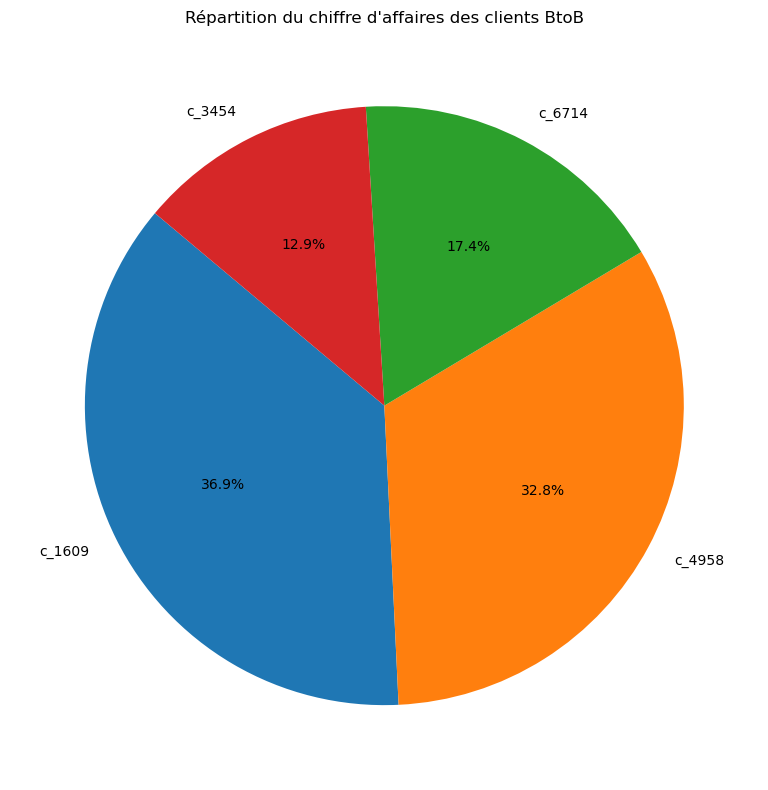

In [39]:
# Graph répartition CA BtoB

plt.figure(figsize=(8,8))
plt.pie(
    ca_btob['CA'],
    labels=ca_btob['client_id'],
    autopct='%1.1f%%',
    startangle=140)
plt.title("Répartition du chiffre d'affaires des clients BtoB")
plt.tight_layout()
plt.show()

In [40]:
# Analyse anexte (pas demandé) Part CA btob sur CA général

# CA total de l'entreprise
ca_total = df_merged['CA'].sum()
ca_btob = ca_btob.set_index('client_id').reindex(clients_btob).reset_index()
ca_autres = ca_total - ca_btob['CA'].sum()

# Créer le DataFrame
ca_parts = pd.DataFrame({'Type': list(ca_btob['client_id']) + ['Autres clients'],'CA': list(ca_btob['CA']) + [ca_autres]})
ca_parts

,Type,CA
0,c_1609,326039.89
1,c_6714,153918.60
2,c_3454,114110.57
3,c_4958,290227.03
4,Autres clients,11143367.01


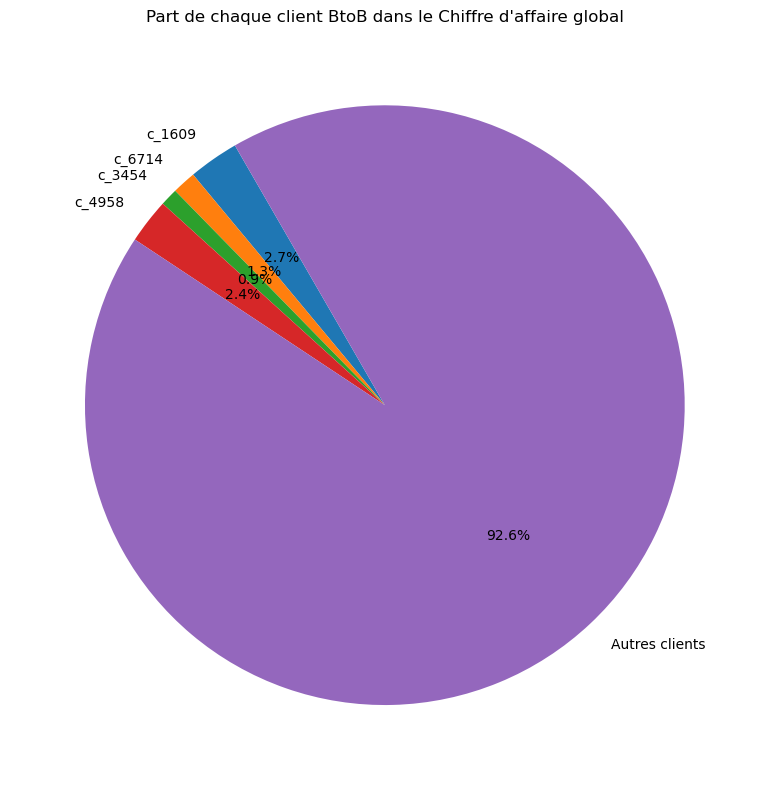

In [41]:
plt.figure(figsize=(8,8))
plt.pie(
    ca_parts['CA'],
    labels=ca_parts['Type'],
    autopct='%1.1f%%',
    startangle=120
)
plt.title("Part de chaque client BtoB dans le Chiffre d'affaire global")
plt.tight_layout()
plt.show()

In [42]:
#COURBE DE LORENZ

In [43]:
# CA par client
ca_par_client = df_merged.groupby('client_id')['CA'].sum().sort_values().reset_index()
ca_par_client

,client_id,CA
0,c_8351,6.31
1,c_8140,8.30
2,c_8114,9.98
3,c_4648,11.20
4,c_4478,13.36
...,...,...
8595,c_1570,5285.82
8596,c_3454,114110.57
8597,c_6714,153918.60
8598,c_4958,290227.03


In [44]:
# Calcul cumulatif du CA et des clients
ca_cum = ca_par_client['CA'].cumsum()
ca_cum = ca_cum / ca_cum.max() 
n_clients = np.arange(1, len(ca_par_client)+1) / len(ca_par_client)  

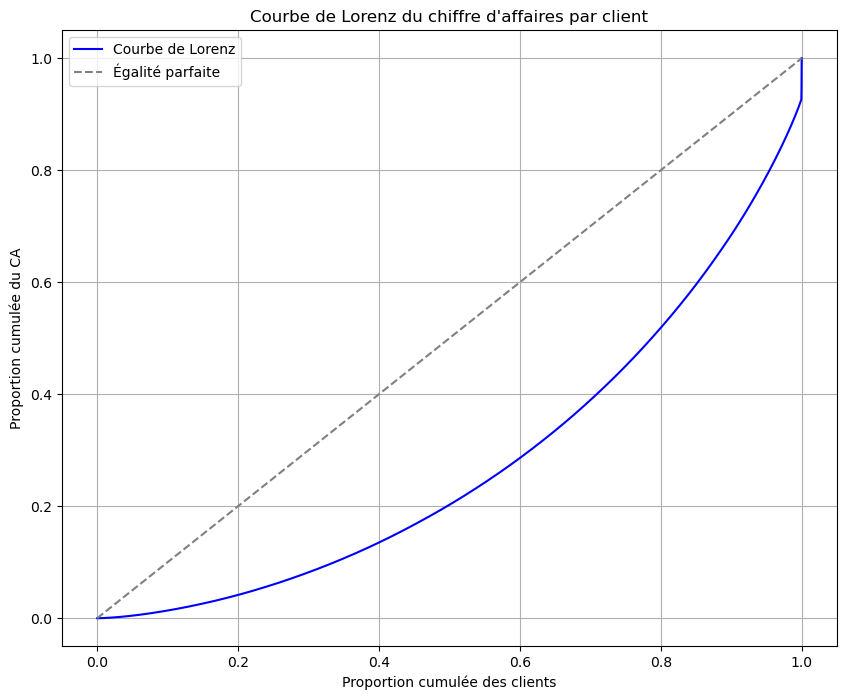

In [45]:
#Courbe de Lorenz du CA par client

plt.figure(figsize=(10, 8))
plt.plot(n_clients, ca_cum, label='Courbe de Lorenz', color='blue')
plt.plot([0,1], [0,1], '--', color='gray', label='Égalité parfaite')
plt.xlabel('Proportion cumulée des clients')
plt.ylabel('Proportion cumulée du CA')
plt.title('Courbe de Lorenz du chiffre d\'affaires par client')
plt.legend()
plt.grid(True)
plt.show()

# ON NE PREND PLUS EN COMPTE LES BTOB

In [47]:
df_no_btob = df_merged[~df_merged['client_id'].isin(clients_btob)].copy()
df_no_btob

,id_prod,date,session_id,client_id,price,categ,sex,birth,CA,month,week
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0.0,f,1967.0,11.99,2021-03-01,2021-03-01/2021-03-07
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0.0,m,1960.0,19.37,2021-03-01,2021-03-01/2021-03-07
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0.0,m,1988.0,4.50,2021-03-01,2021-03-01/2021-03-07
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0.0,f,1989.0,6.55,2021-03-01,2021-03-01/2021-03-07
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0.0,f,1956.0,16.49,2021-03-01,2021-03-01/2021-03-07
...,...,...,...,...,...,...,...,...,...,...,...
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,48.99,2.0,f,1994.0,48.99,2023-02-01,2023-02-27/2023-03-05
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,26.99,1.0,f,1985.0,26.99,2023-02-01,2023-02-27/2023-03-05
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,8.99,0.0,m,1953.0,8.99,2023-02-01,2023-02-27/2023-03-05
687533,0_1398,2023-02-28 23:58:30.792755,s_348435,c_3575,4.52,0.0,f,1981.0,4.52,2023-02-01,2023-02-27/2023-03-05


In [48]:
#Correlation genre / catégorie libre acheté 
table_categ_genre = pd.crosstab(df_no_btob['categ'], df_no_btob['sex'])
table_categ_genre

sex,f,m
categ,,
0.0,200793,186488
1.0,115721,104884
2.0,16980,15868


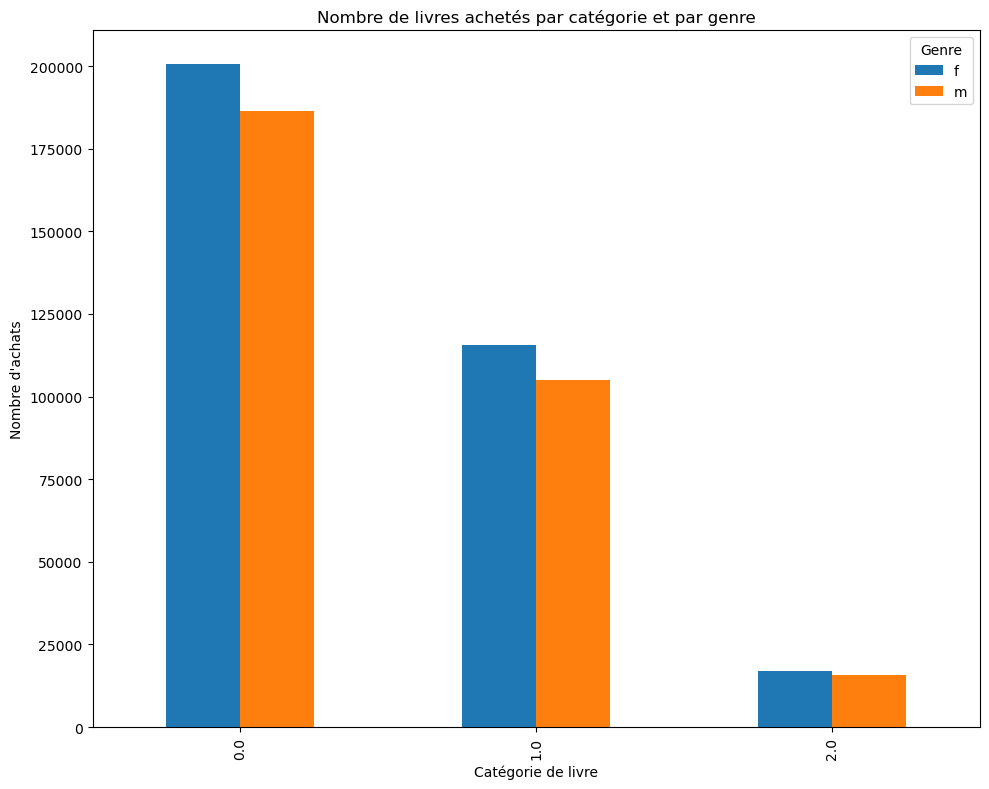

In [49]:
#Correlation genre / catégorie libre acheté 

table_categ_genre.plot(kind='bar', figsize=(10,8))
plt.title("Nombre de livres achetés par catégorie et par genre")
plt.xlabel("Catégorie de livre")
plt.ylabel("Nombre d'achats")
plt.legend(title="Genre")
plt.tight_layout()
plt.show()

In [50]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(table_categ_genre)
print(f"Statistique de chi² : {chi2:.2f}")
print(f"p-value : {p:.4f}")

if p < 0.05:
    print("Il existe une association significative entre le genre et la catégorie de livre achetée.")
else:
    print("Aucune association significative détectée entre le genre et la catégorie de livre achetée.")

Statistique de chi² : 22.67
p-value : 0.0000
Il existe une association significative entre le genre et la catégorie de livre achetée.


In [51]:
#Corrélation âge / montant d'achat

df_no_btob['age'] = 2023 - df_no_btob['birth']
df_no_btob

,id_prod,date,session_id,client_id,price,categ,sex,birth,CA,month,week,age
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0.0,f,1967.0,11.99,2021-03-01,2021-03-01/2021-03-07,56.0
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0.0,m,1960.0,19.37,2021-03-01,2021-03-01/2021-03-07,63.0
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0.0,m,1988.0,4.50,2021-03-01,2021-03-01/2021-03-07,35.0
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0.0,f,1989.0,6.55,2021-03-01,2021-03-01/2021-03-07,34.0
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0.0,f,1956.0,16.49,2021-03-01,2021-03-01/2021-03-07,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,48.99,2.0,f,1994.0,48.99,2023-02-01,2023-02-27/2023-03-05,29.0
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,26.99,1.0,f,1985.0,26.99,2023-02-01,2023-02-27/2023-03-05,38.0
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,8.99,0.0,m,1953.0,8.99,2023-02-01,2023-02-27/2023-03-05,70.0
687533,0_1398,2023-02-28 23:58:30.792755,s_348435,c_3575,4.52,0.0,f,1981.0,4.52,2023-02-01,2023-02-27/2023-03-05,42.0


In [52]:
#Tranche d'âge

bins = list(range(10, 100, 10))
labels = ['moins de 20'] + [f"{i}-{i+10}" for i in bins[1:-1]]
df_no_btob['tranche_age'] = pd.cut(df_no_btob['age'], bins=bins, labels=labels, right=False)
df_no_btob

,id_prod,date,session_id,client_id,price,categ,sex,birth,CA,month,week,age,tranche_age
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0.0,f,1967.0,11.99,2021-03-01,2021-03-01/2021-03-07,56.0,50-60
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0.0,m,1960.0,19.37,2021-03-01,2021-03-01/2021-03-07,63.0,60-70
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0.0,m,1988.0,4.50,2021-03-01,2021-03-01/2021-03-07,35.0,30-40
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0.0,f,1989.0,6.55,2021-03-01,2021-03-01/2021-03-07,34.0,30-40
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0.0,f,1956.0,16.49,2021-03-01,2021-03-01/2021-03-07,67.0,60-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,48.99,2.0,f,1994.0,48.99,2023-02-01,2023-02-27/2023-03-05,29.0,20-30
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,26.99,1.0,f,1985.0,26.99,2023-02-01,2023-02-27/2023-03-05,38.0,30-40
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,8.99,0.0,m,1953.0,8.99,2023-02-01,2023-02-27/2023-03-05,70.0,70-80
687533,0_1398,2023-02-28 23:58:30.792755,s_348435,c_3575,4.52,0.0,f,1981.0,4.52,2023-02-01,2023-02-27/2023-03-05,42.0,40-50


In [72]:
#CA tranche d'âge
ca_tranches = df_no_btob.groupby('tranche_age')['CA'].mean().reset_index().dropna()

ca_tranches

C:\Users\David\AppData\Local\Temp\ipykernel_7744\864144104.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ca_tranches = df_no_btob.groupby('tranche_age')['CA'].mean().reset_index().dropna()


,tranche_age,CA
0,moins de 20,39.776612
1,20-30,39.919523
2,30-40,14.947460
3,40-50,13.314356
4,50-60,15.716464
5,60-70,16.904878
6,70-80,16.642774
7,80-90,16.927979


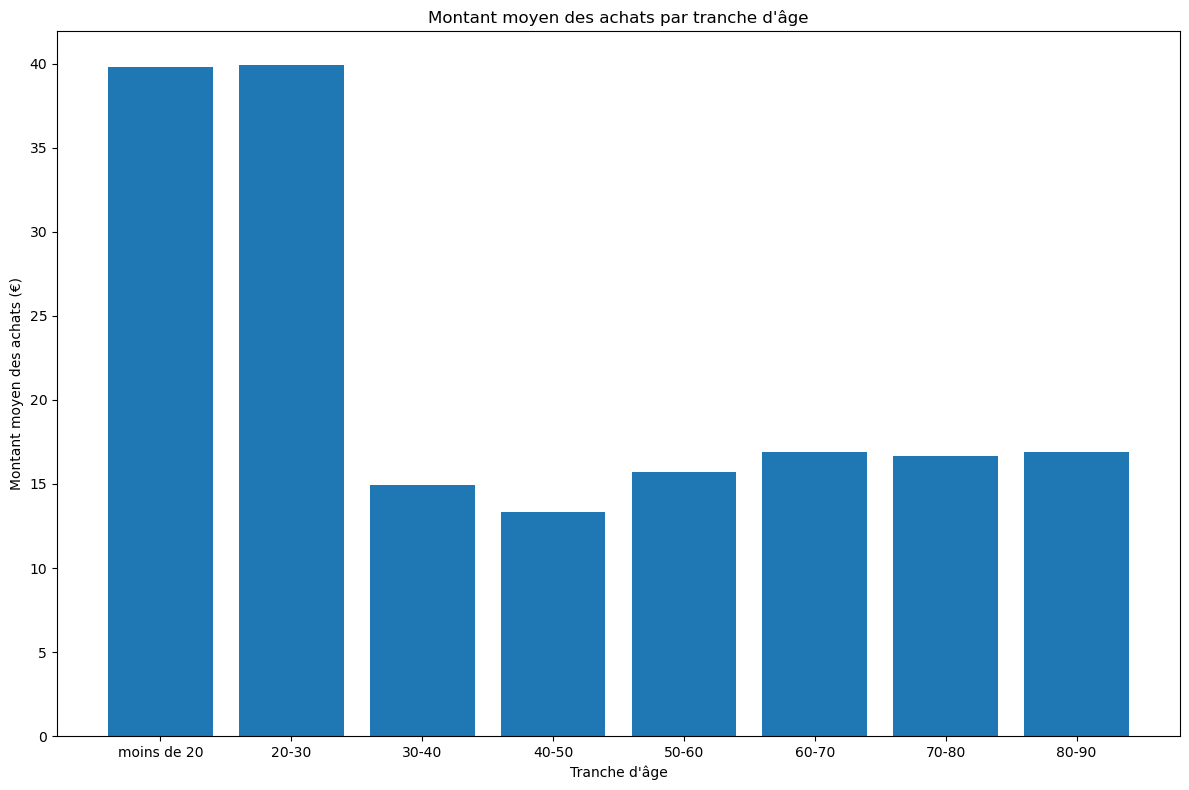

In [74]:
#Graph corrélation age / montant achat

plt.figure(figsize=(12,8))
plt.bar(ca_tranches['tranche_age'].astype(str), ca_tranches['CA'])
plt.xlabel("Tranche d'âge")
plt.ylabel("Montant moyen des achats (€)")
plt.title("Montant moyen des achats par tranche d'âge")
plt.tight_layout()
plt.show()

In [55]:
# ANALYSE : 

ca_age_no_btob = df_no_btob.groupby('client_id').agg({'CA': 'sum', 'age': 'first'}).reset_index()
ca_age_no_btob

,client_id,CA,age
0,c_1,629.02,68.0
1,c_10,1353.60,67.0
2,c_100,254.85,31.0
3,c_1000,2291.88,57.0
4,c_1001,1823.85,41.0
...,...,...,...
8591,c_995,189.41,68.0
8592,c_996,1637.34,53.0
8593,c_997,1490.01,29.0
8594,c_998,2822.22,22.0


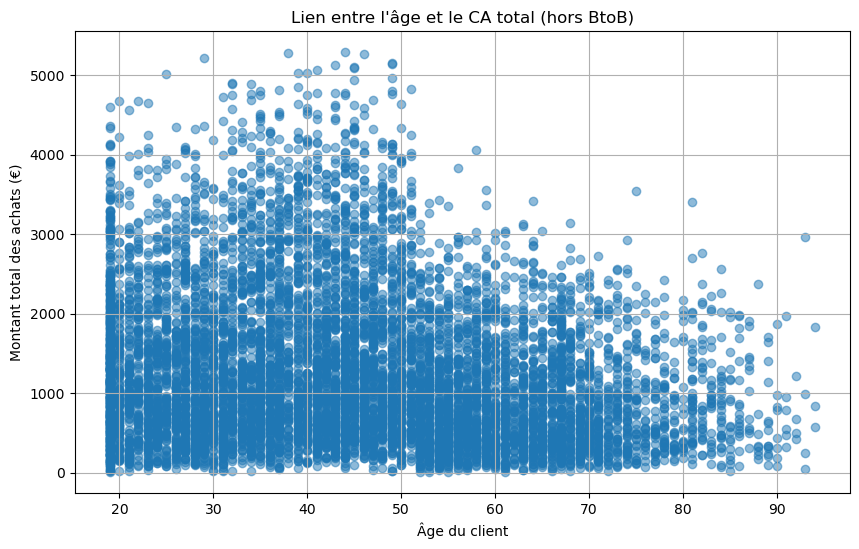

In [56]:
# Graphique en point 
plt.figure(figsize=(10,6))
plt.scatter(ca_age_no_btob['age'], ca_age_no_btob['CA'], alpha=0.5)
plt.xlabel("Âge du client")
plt.ylabel("Montant total des achats (€)")
plt.title("Lien entre l'âge et le CA total (hors BtoB)")
plt.grid(True)
plt.show()

In [57]:
#Vérification Normalité pour pearson ou spearman

from scipy.stats import shapiro
stat, p = shapiro(ca_age_no_btob['CA'])
print(f"Stat Shapiro : {stat:.2f}, p-value : {p:.4f}")
if p < 0.05:
    print("Normalité n'est pas vérifié .")
else:
    print("Normalité vérifié.")

Stat Shapiro : 0.90, p-value : 0.0000
Normalité n'est pas vérifié .


C:\Users\David\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8596.
  res = hypotest_fun_out(*samples, **kwds)


In [58]:
# test statistique ave Spearman
from scipy.stats import pearsonr, spearmanr

spearman_corr, spearman_p = spearmanr(ca_age_no_btob['age'], ca_age_no_btob['CA'])
print(f"Spearman : corr = {spearman_corr:.2f}, p = {spearman_p:.4f}")

Spearman : corr = -0.18, p = 0.0000


In [59]:
# Corrélation fréquence d'achat / Tranche d'age

freq_achat = df_no_btob.groupby('client_id').agg({'age': 'first', 'CA': 'count'}).rename(columns={'CA': 'frequence_achat'}).reset_index()
freq_achat

,client_id,age,frequence_achat
0,c_1,68.0,43
1,c_10,67.0,58
2,c_100,31.0,8
3,c_1000,57.0,126
4,c_1001,41.0,103
...,...,...,...
8591,c_995,68.0,14
8592,c_996,53.0,96
8593,c_997,29.0,59
8594,c_998,22.0,55


In [60]:
freq_achat['tranche_age'] = pd.cut(freq_achat['age'], bins=bins, labels=labels, right=False)
freq_par_tranche = freq_achat.groupby('tranche_age')['frequence_achat'].mean().reset_index() .dropna()
freq_par_tranche

C:\Users\David\AppData\Local\Temp\ipykernel_7744\1116827379.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_par_tranche = freq_achat.groupby('tranche_age')['frequence_achat'].mean().reset_index() .dropna()


,tranche_age,frequence_achat
0,moins de 20,35.462243
1,20-30,33.451891
2,30-40,102.715256
3,40-50,117.404279
4,50-60,68.556003
5,60-70,56.455253
6,70-80,53.118812
7,80-90,56.168269


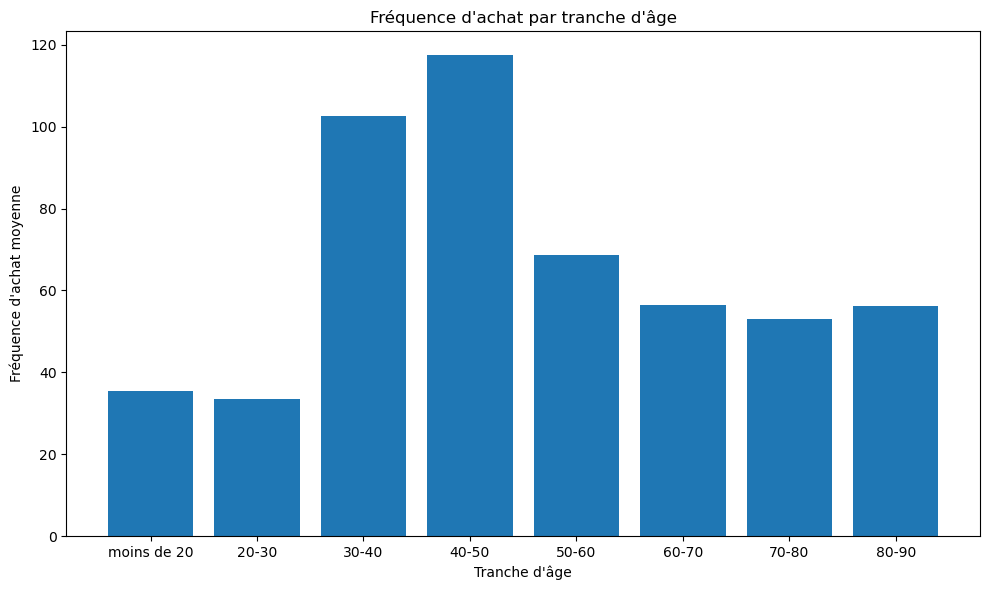

In [61]:
#Graph fréquence achat par tranche d'âge

plt.figure(figsize=(10,6))
plt.bar(freq_par_tranche['tranche_age'].astype(str), freq_par_tranche['frequence_achat'])
plt.xlabel("Tranche d'âge")
plt.ylabel("Fréquence d'achat moyenne")
plt.title("Fréquence d'achat par tranche d'âge")
plt.tight_layout()
plt.show()

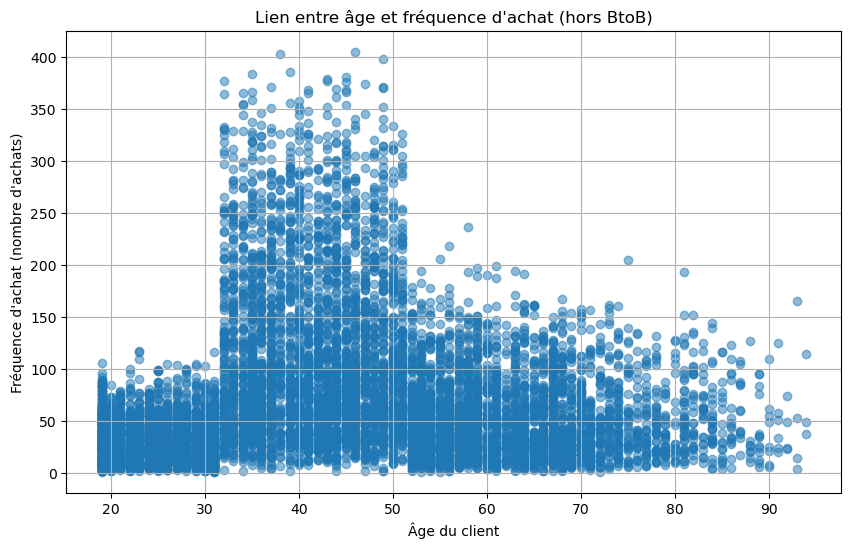

In [62]:
# Graph en point

plt.figure(figsize=(10,6))
plt.scatter(freq_achat['age'], freq_achat['frequence_achat'], alpha=0.5)
plt.xlabel("Âge du client")
plt.ylabel("Fréquence d'achat (nombre d'achats)")
plt.title("Lien entre âge et fréquence d'achat (hors BtoB)")
plt.grid(True)
plt.show()

In [63]:
# Test normalité :

stat, p = shapiro(freq_achat['frequence_achat'])
print(f"Stat Shapiro : {stat:.2f}, p-value : {p:.4f}")
if p < 0.05:
    print("Normalité n'est pas vérifié .")
else:
    print("Normalité est vérifié .")

Stat Shapiro : 0.82, p-value : 0.0000
Normalité n'est pas vérifié .


C:\Users\David\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8596.
  res = hypotest_fun_out(*samples, **kwds)


In [64]:
# Spearman 
spearman_corr, spearman_p = spearmanr(freq_achat['age'], freq_achat['frequence_achat'])
print(f"Spearman : corr = {spearman_corr:.2f}, p = {spearman_p:.4f}")

Spearman : corr = 0.13, p = 0.0000


In [65]:
#Corrélation entre âge des clients / taille du panier moyen

ca_total_par_client = df_no_btob.groupby('client_id')['CA'].sum()

In [66]:
#Nombre achat par client
n_achats_par_client = df_no_btob.groupby('client_id').size()

In [67]:
#Panier moyen par client
panier_moyen = (ca_total_par_client / n_achats_par_client)
panier_moyen = panier_moyen.reset_index(name='panier_moyen')
panier_moyen

,client_id,panier_moyen
0,c_1,14.628372
1,c_10,23.337931
2,c_100,31.856250
3,c_1000,18.189524
4,c_1001,17.707282
...,...,...
8591,c_995,13.529286
8592,c_996,17.055625
8593,c_997,25.254407
8594,c_998,51.313091


In [68]:
# ajout âge du client
ages = df_no_btob.groupby('client_id')['tranche_age'].first().reset_index()
panier_moyen = panier_moyen.merge(ages, on='client_id')
panier_moyen

,client_id,panier_moyen,tranche_age
0,c_1,14.628372,60-70
1,c_10,23.337931,60-70
2,c_100,31.856250,30-40
3,c_1000,18.189524,50-60
4,c_1001,17.707282,40-50
...,...,...,...
8591,c_995,13.529286,60-70
8592,c_996,17.055625,50-60
8593,c_997,25.254407,20-30
8594,c_998,51.313091,20-30


In [69]:
panier_par_tranche = panier_moyen.groupby('tranche_age')['panier_moyen'].mean().reset_index().dropna()
panier_par_tranche

C:\Users\David\AppData\Local\Temp\ipykernel_7744\3665336884.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  panier_par_tranche = panier_moyen.groupby('tranche_age')['panier_moyen'].mean().reset_index().dropna()


,tranche_age,panier_moyen
0,moins de 20,40.527626
1,20-30,41.440210
2,30-40,18.913593
3,40-50,13.487123
4,50-60,16.118859
5,60-70,16.874041
6,70-80,16.667478
7,80-90,16.972521


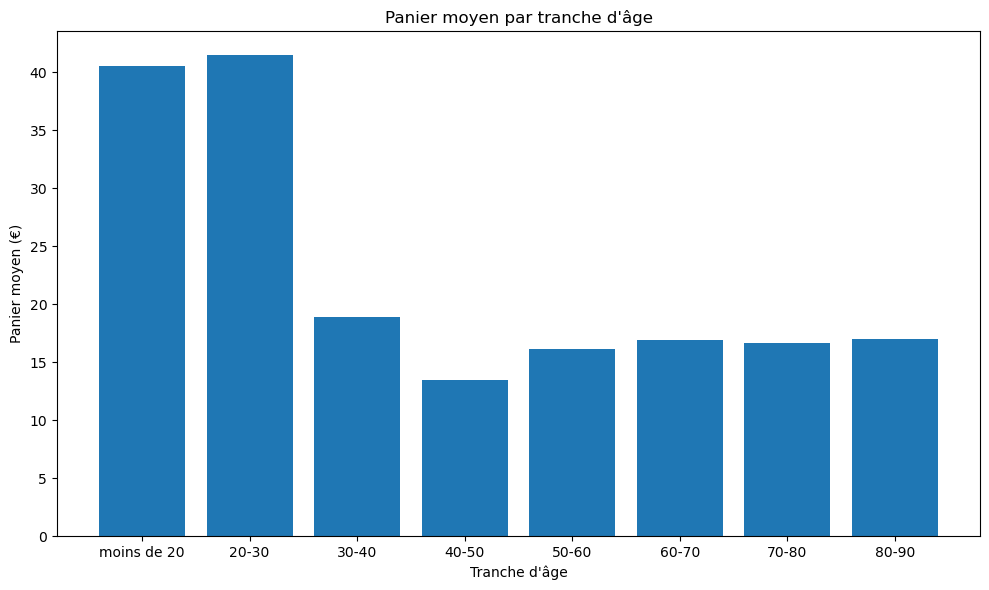

In [70]:
# Graph Panier moyen par tranche d'âge

plt.figure(figsize=(10,6))
plt.bar(panier_par_tranche['tranche_age'].astype(str), panier_par_tranche['panier_moyen'])
plt.xlabel("Tranche d'âge")
plt.ylabel("Panier moyen (€)")
plt.title("Panier moyen par tranche d'âge")
plt.tight_layout()
plt.show()

In [76]:
ages2 = df_no_btob.groupby('client_id')['age'].first().reset_index()
panier_moyen2 = panier_moyen.merge(ages2, on='client_id')
panier_moyen2

,client_id,panier_moyen,tranche_age,age
0,c_1,14.628372,60-70,68.0
1,c_10,23.337931,60-70,67.0
2,c_100,31.856250,30-40,31.0
3,c_1000,18.189524,50-60,57.0
4,c_1001,17.707282,40-50,41.0
...,...,...,...,...
8591,c_995,13.529286,60-70,68.0
8592,c_996,17.055625,50-60,53.0
8593,c_997,25.254407,20-30,29.0
8594,c_998,51.313091,20-30,22.0


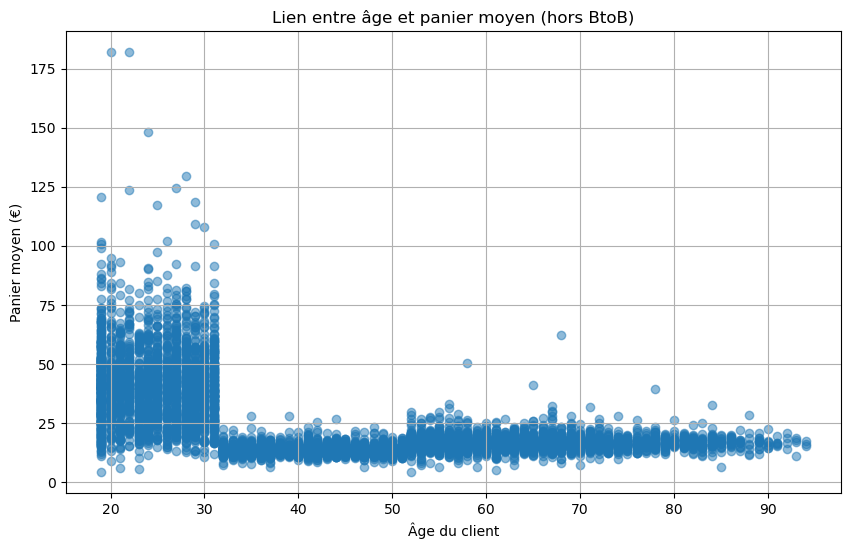

In [78]:

plt.figure(figsize=(10,6))
plt.scatter(panier_moyen2['age'], panier_moyen2['panier_moyen'], alpha=0.5)
plt.xlabel("Âge du client")
plt.ylabel("Panier moyen (€)")
plt.title("Lien entre âge et panier moyen (hors BtoB)")
plt.grid(True)
plt.show()

In [80]:
# Test Normalité :

stat, p = shapiro(panier_moyen['panier_moyen'])
print(f"Stat Shapiro : {stat:.2f}, p-value : {p:.4f}")
if p < 0.05:
    print("Normalité n'est pas vérifié ..")
else:
    print("Normalité est pas vérifié .")

Stat Shapiro : 0.69, p-value : 0.0000
Normalité n'est pas vérifié ..


C:\Users\David\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8596.
  res = hypotest_fun_out(*samples, **kwds)


In [82]:
# Test de Spearman
spearman_corr, spearman_p = spearmanr(panier_moyen2['age'], panier_moyen2['panier_moyen'])
print(f"Spearman : corr = {spearman_corr:.2f}, p = {spearman_p:.4f}")
if p < 0.05:
    print("Il existe une association significative entre la tranche d'âge et la catégorie de livres achetés.")
else:
    print("Aucune association significative détectée entre la tranche d'âge et la catégorie.")

Spearman : corr = -0.33, p = 0.0000
Il existe une association significative entre la tranche d'âge et la catégorie de livres achetés.


In [84]:
# Corrélation entre l'âge des clients et la catégorie des livres achetés

table_age_categ = pd.crosstab(df_no_btob['tranche_age'], df_no_btob['categ'])
table_age_categ

categ,0.0,1.0,2.0
tranche_age,,,
moins de 20,3418,6067,6012
20-30,10990,19674,19748
30-40,119972,41628,4696
40-50,156851,50901,758
50-60,54250,47232,735
60-70,24801,32685,550
70-80,11541,15065,219
80-90,4954,6607,122


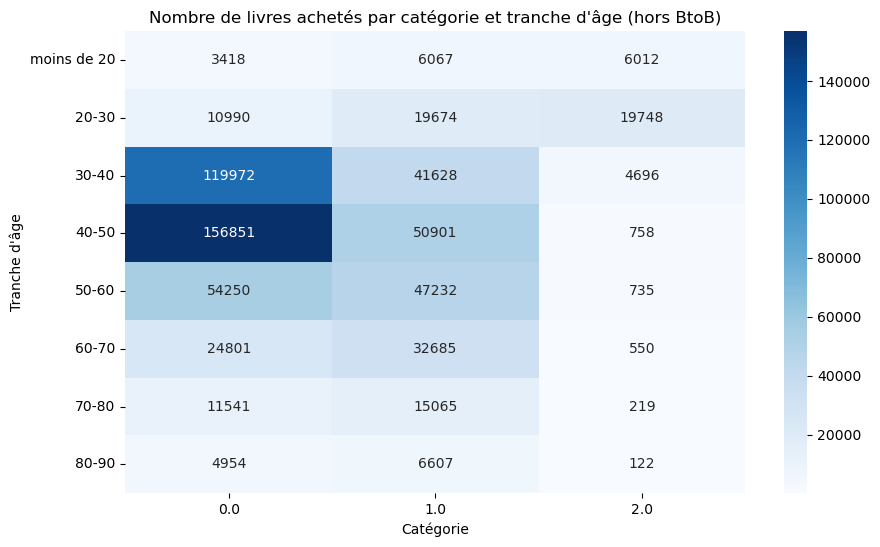

In [86]:
plt.figure(figsize=(10,6))
sns.heatmap(table_age_categ, annot=True, fmt='d', cmap='Blues')
plt.title("Nombre de livres achetés par catégorie et tranche d'âge (hors BtoB)")
plt.xlabel("Catégorie")
plt.ylabel("Tranche d'âge")
plt.show()

In [88]:
chi2, p, dof, expected = chi2_contingency(table_age_categ)
print(f"Statistique du chi² : {chi2:.2f}")
print(f"p-value : {p:.4f}")

if p < 0.05:
    print("Il existe une association significative entre la tranche d'âge et la catégorie de livres achetés.")
else:
    print("Aucune association significative détectée entre la tranche d'âge et la catégorie.")

Statistique du chi² : 227860.11
p-value : 0.0000
Il existe une association significative entre la tranche d'âge et la catégorie de livres achetés.
